# Task  4 - To Explore Decision Tree Algorithm

**Problem Statement :** For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

**Auther : SHUBHAM G GAJBHIYE**


In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# read train data
path = '/content/drive/My Drive/Assingment/'
data = pd.read_csv(os.path.join(path,'Iris.csv'))

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


*Lets Start With EDA*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# check null values
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.drop(columns=['Id'],inplace = True)

In [ ]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

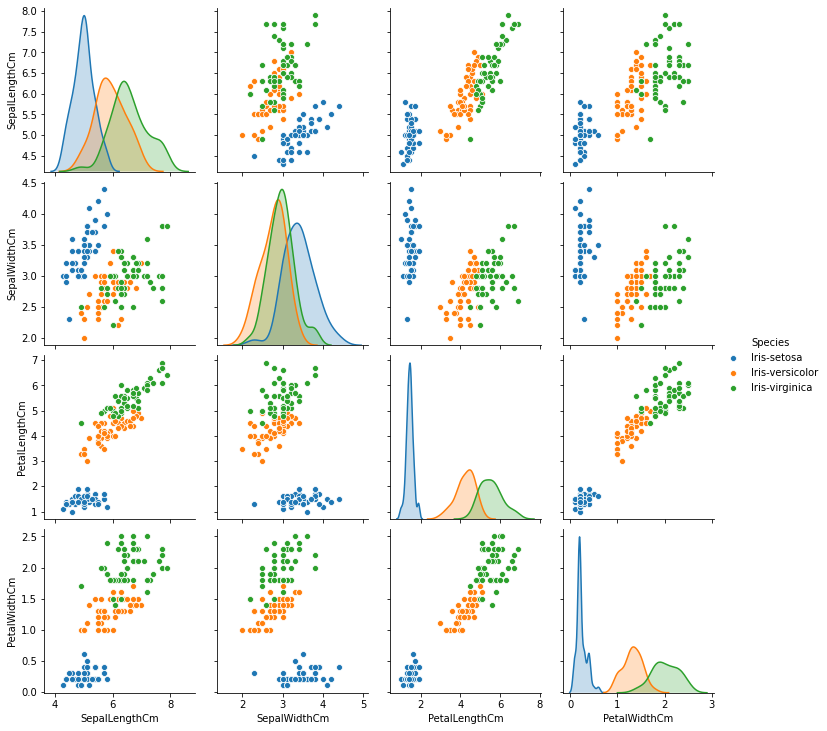

In [ ]:
sb.pairplot(data,hue='Species')

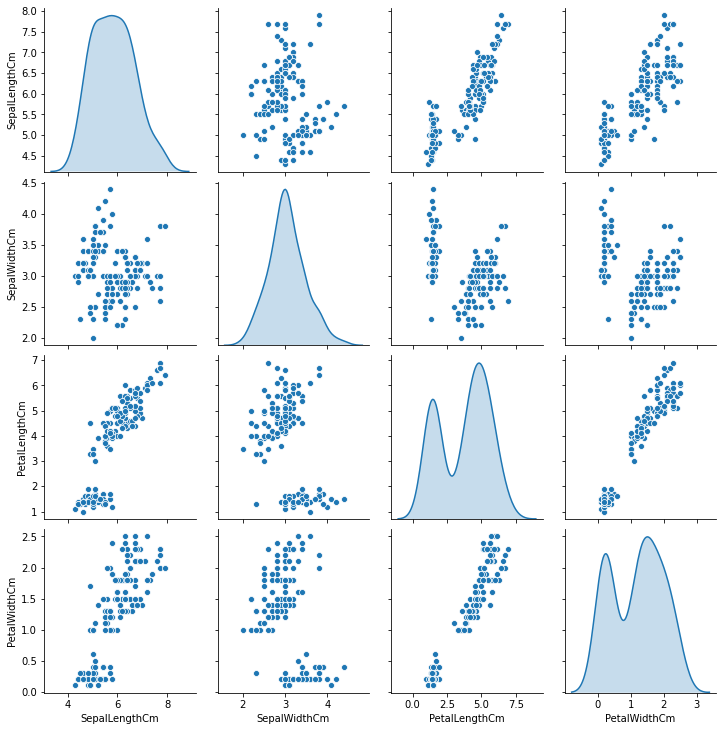

In [ ]:
sb.pairplot(data,diag_kind='kde')

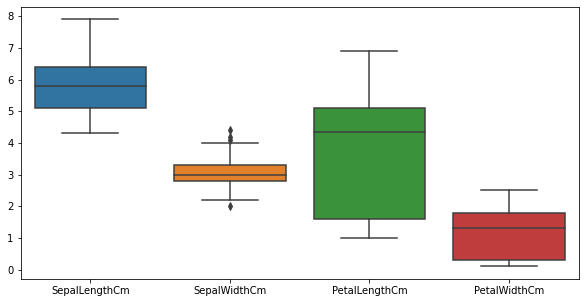

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(data=data)

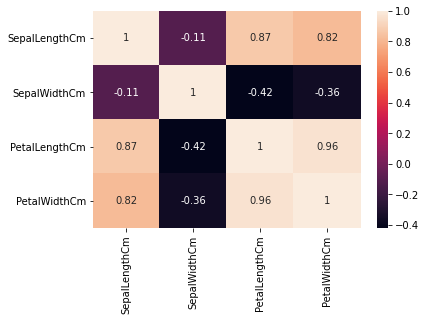

In [ ]:
sb.heatmap(data.corr(),annot=True)

**Note:**


> 1. From the EDA , we can conclude that SepalWiidthCM is more skewed and having more outlier .Also in PetalLengthCM and PetalWidthCm are less skewed.
> 2. From corr heatmap, we can see that most of features are correlated lets decide corr threshold in 95% then PetalWidthCm and PetalLengthCm is highly correlated so we can drop one of the feature from it.
> 3. Data is perfectly balanced









**Preparing Training and Testing Data**

In [ ]:
copy_data = data.copy(deep = True)
target = {'Iris-setosa' : 0 , 'Iris-virginica' : 1 ,'Iris-versicolor' : 2}
data['Species'].replace(target,inplace=True)
x = data.iloc[:,0:-1]
y = data.Species
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Build and Train Decision Tree Model**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Evalute Model using various metrics**

In [ ]:
from sklearn.metrics import classification_report
y_pred = dt_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.90      0.90        10
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

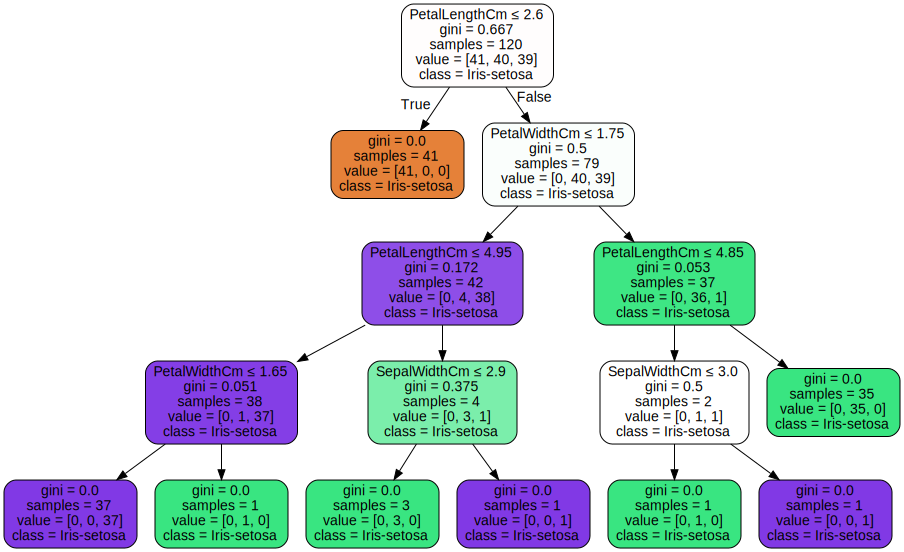

In [ ]:
dot_data = tree.export_graphviz(dt_model, out_file=None,feature_names=copy_data.columns[0:-1],class_names=copy_data.iloc[:,-1],filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Summary**

> 1. By Observing the Tree plot of decision tree we can see that how decision tree divides whole data based on gini impurity and if else condition on various
feature 

